# Artificial Intelligence: Unit 1

    

---



The goal of the project is to implement search algorithms and to find the optimal path in an $N\times N$ labyrinth.


# Instructions

## Part 1
The goal of the first part is to construct mazes. This Wikipedia article provides various algorithms for this purpose, including the one used below. Note that the algorithms in the mentioned article generate mazes with a single path between any two points (the maze structure is a connected tree).

You are asked to fill in the missing code sections so that the randomly generated mazes can have variable obstacle/wall density (determined by the threshold parameter). All maps must ensure at least one valid path between a starting point (S) and an ending point (F).

In all questions, use structured code and include comments to clarify your logic.


### Example Mazes:
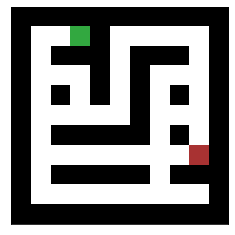
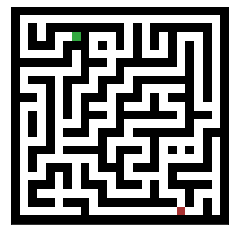
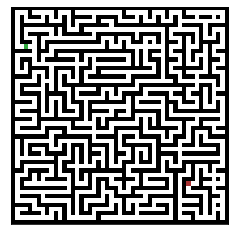

## Part 2

In the second part of the project, you are asked to implement various algorithms for finding the shortest path between two nodes in the mazes generated by the code from Part 1. Additionally, you are required to create different cost functions, both for measuring the actual distances and for estimating the distances from a node to the target node (heuristic). You may also experiment with any of the parameters of each algorithm to study how these changes affect complexity, time, and optimal path length. These algorithms and their variations will be executed on mazes of varying sizes. Implement the algorithms in the code cell for Part 2.<br>

The general form of the cost function in the A* algorithm is:
$$f(n)=g(n)+h(n)$$
Here:

 $g(n)$ The actual cost from the starting point to node $n$, 
 
 $h(n)$ A heuristic estimate of the cost from node $n$ to the target node.

You are asked to experiment with the following choices for the two functions:
* $g(n)=0$ and $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Which search algorithm does this correspond to? Can it always find the optimal path?
* $g(n)=1$ and $h(n)=0$. Which search algorithm does this correspond to? Can it always find the optimal path?
* $g(n)=1$ and $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Which search algorithm does this correspond to? Can it always find the optimal path?


## Part 3

In the third part, you are required to conduct a comparative study of the algorithms implemented in Part 2 to draw conclusions. The algorithms will be compared based on their complexity and their ability to find the optimal path.

o analyze how the size of the labyrinth affects the algorithms, generate maps with dimensions $N=[10,20,\ldots,100]$. For each configuration, it is suggested to generate 100 different maps and execute the above algorithms on them.

You are then asked to collect the following characteristics:
 * The length of the shortest path identified by each algorithm.
 * The number of expanded nodes for each algorithm, which serves as a measure of their complexity.

 To facilitate drawing conclusions from the above configurations, create two plots:
 * The length of the shortest path as a function of the map size.
 * The number of expanded nodes as a function of the map size.


 Additional Notes:

 * In all the above experiments, you can assume the starting point is $(1,1)$ and the ending point is $(N-2,N-2)$. Alternatively, you can experiment with random starting and ending points.
 * Although the maps are randomly generated, running algorithms on different maps produces incomparable results.
 * For easier comparison, it is recommended to place multiple plots in the same coordinate system where feasible.

**Visualization**: You are also provided with a class that generates an animation of the search performed by each algorithm. To use this class, follow these four steps:

1.	Create an instance of the class by executing: `visualization(Start, Goal)`. This command creates a visualization object..
2.	Add frames to the video: At every step where you want to add a frame to the video, call the method `draw_step(grid, frontier, expanded_nodes)`, where:
* grid: A map of type Maze.
* frontier: A list containing the current search frontier.
* expanded_nodes: A list of nodes already expanded by the algorithm.

3.	(Optional) To include the optimal path found by the algorithm in the animation, call the method add_path(path).

4.	Display or save the animation:
* To display the animation: Use `show_gif()`. 
* To save the animation: Use `save_gif (filename)` (the file should have a .gif extension).
* To display only the last frame: Use `show_last_frame()` 

Can you draw the same conclusions about algorithm complexity by observing the visualization?

## Part 4

In the fourth part of the project, there is a ghost 👻 in the labyrinth! The goal is to reach the endpoint while avoiding the ghost, which chases us by running its own A* algorithm at every step. The code that runs the ghost "Agent" is provided as is.

To avoid the ghost, we will implement the AB algorithm. Specifically, you are given the "ABagent" class in which you are asked to fill in the moves for the minimizing_player (as taught in class), given the corresponding moves of the maximizing_player. As part of this algorithm, you will need to define a heuristic function that estimates the cost of the next state by taking into account the distance from both the goal and the ghost.

Describe in an appropriate markdown cell your reasoning behind your choices regarding the heuristic. How did you calculate the distances (with an estimated/actual metric)? Provide detailed results and observations regarding these choices. Emphasis is placed on experimentation and reporting of the results regarding the heuristic, rather than the search for the best function. As deliverables, please include: descriptive gifs and execution times. Justify why your algorithm works correctly.

**ATTENTION!** In Part 4, the labyrinths you use must have sparse obstacles. If the existing paths to the goal are few, it will be difficult to escape from the ghost regardless of your implementation.

## Code for visualization


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

class visualization:
    def __init__(self, S, F):
        '''
          Η μέθοδος αυτή αρχικοποιεί ένα αντικείμενο τύπου visualization.
          Είσοδος:
          -> S: το σημείο εκκίνσης της αναζήτησης
          -> F: το σημείο τερματισμού
        '''
        self.S = S
        self.F = F
        self.images = []

    def draw_step(self, grid, frontier, expanded_nodes):
        '''
          Η συνάρτηση αυτή καλείται για να σχεδιαστεί ένα frame στο animation (πρακτικά έπειτα από την επέκταση κάθε κόμβου)
          Είσοδος:
          -> grid: Ένα χάρτης τύπου grid
          -> frontier: Μια λίστα με τους κόμβους που ανήκουν στο μέτωπο της αναζήτησης
          -> expanded_nodes: Μια λίστα με τους κόμβους που έχουν ήδη επεκταθεί
          Επιστρέφει: None
          Η συνάρτηση αυτή πρέπει να καλεστεί τουλάχιστον μια φορά για να μπορέσει να σχεδιαστει ένα animation (πρεπεί το animation να έχει τουλάχιστον ένα frame).
        '''
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
        image[~grid.grid] = [0, 0, 0]
        image[grid.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[grid.grid] = [0, 0, 0]
        # image[~grid.grid] = [255, 255, 255]

        for node in expanded_nodes:
            image[node] = [0, 0, 128]

        for node in frontier:
            image[node] = [0, 225, 0]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)

    def add_path(self, path):
        '''
          Η συνάρτηση αυτή προσθέτει στο τελευταίο frame το βέλτιστο μονοπάτι.
          Είσοδος:
          -> path: Μια λίστα η όποια περιέχει το βέλτιστο μονοπάτι (η οποία πρέπει να περιέχει και τον κόμβο αρχή και τον κόμβο στόχο)
          Έξοδος: None
        '''
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        for _ in range (100):
            self.images.append(image)

    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani

    def save_gif(self, filename, fps = 30):
        '''
            Η συνάρτηση αυτή ξαναδημιουργεί και αποθηκεύει το animation σε ένα αρχείο.
            Είσοδος:
            -> Το όνομα του αρχείου με κατάληξη .gif
            Έξοδος: (None)
        '''
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        '''
            Η συνάρτηση αυτή εμφανίζει inline το animation.
            Είσοδος:
            -> fps: τα frames per second
            Έξοδος: Το αντικείμενο που παίζει το animation
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        '''
            Η μέθοδος αυτή εμφανίζει inline το τελευταίο frame που έχει δημιουργήθει.
            Είσοδος:
            Έξοδος: Το αντικείμενο που εμφανίζει την εικόνα.
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

## Part 1

In [ ]:
%matplotlib inline
import numpy as np
from queue import LifoQueue
import  random
import matplotlib.pyplot as plt


class Maze:
    def __init__(self, N, S, F, threshold=0.02):

      """
      N: integer that indicates the size of the NxN grid of the maze
      S: pair of integers that indicates the coordinates of the starting point (S)
      F: pair of integers that indicates the coordinates of the finish point (F)
      You can add any other parameters you want to customize maze creation (e.g. variables that
      control the creation of additional paths)
      """

      assert N > 2

      ## Make sure start and end are within the grid

      assert S < (N-1, N-1)
      assert F < (N-1, N-1)

      assert S > (0, 0)
      assert F > (0, 0)

      # Add here any additional constraints your implementation may have

      assert N % 2 == 1
      assert S[0] % 2 == 1
      assert S[1] % 2 == 1
      assert F[0] % 2 == 1
      assert F[1] % 2 == 1

      self.N = N
      self.S = S
      self.F = F

      # Keep track of the agents in the Maze
      self.agents=[]

      ## Initialize grid

      self.grid = np.zeros((N, N), dtype=bool)

      def neighbors(node, N, visited, threshold):
        """
        Returns all neighbors of a node that are either unvisited, or they are visited but
        there is a wall between the node and the neighbor and the neighbor passes a random test.
        """

        l = []
        x, y = node

        # first condition in all checks is for boundaries
        # neighbors are +-2 in x or y
        # walls are +-1

        if x > 2 and (not visited[x-2, y] or (not visited[x-1,y]  and random.uniform(0,1) <= threshold)):
            l.append((x-2, y))
        if x < N-2 and (not visited[x+2, y] or (not visited[x+1,y] and random.uniform(0,1) <= threshold)):
            l.append((x+2,y))
        if y > 2 and (not visited[x, y-2] or (not visited[x,y-1] and random.uniform(0,1) <= threshold)):
            l.append((x,y-2))
        if y < N-2 and (not visited[x, y+2] or (not visited[x,y+1] and random.uniform(0,1) <= threshold)):
            l.append((x,y+2))

        return l

      stack = []
      stack.append(self.S)
      self.grid[self.S] = True

      while stack:
          current_node = stack.pop()
          # get all unvisited neighbors (and some visited ones with a random chance)
          n = neighbors(current_node, self.N, self.grid, threshold)
          if len(n):
              stack.append(current_node)


              # select a random neighbor
              next_node = random.choice(n)

              # break the wall between current and next node
              wall = ((next_node[0]+current_node[0]) // 2, (next_node[1]+current_node[1]) // 2)
              self.grid[wall] = True


              # mark next node as visited and add it to the stack
              self.grid[next_node] = True
              stack.append(next_node)



    def adjacent_no_walls(self, node):
      x, y = node
      ret = []
      if x - 1 > -1 and self.grid[x-1,y]:
        ret.append((x-1,y))
      if x + 1 < self.N and self.grid[x+1,y]:
        ret.append((x+1,y))
      if y - 1 > -1 and self.grid[x,y-1]:
        ret.append((x,y-1))
      if y + 1 < self.N and self.grid[x,y+1]:
        ret.append((x,y+1))
      return ret



    def draw_map(self, path=None,return_image=False):
        """
        Draws the maze as an image. Considers grid values of 0/False to represent obstacles and
        values of 1/True to represent empty cells, but this can be customized. Obstacles are painted
        black and empty cells are painted white. Starting point is painted green and finish point red.
        Optionally accepts as a parameter a path within the maze which is painted blue.
        """
        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[~self.grid] = [0, 0, 0]
        image[self.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[self.grid] = [0, 0, 0]
        # image[~self.grid] = [255, 255, 255]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        if len(self.agents)>0:
          for a in self.agents:
            image[a.location]=a.color

        if return_image:
          return image
        else:
          plt.imshow(image)
          plt.xticks([])
          plt.yticks([])
          plt.show()


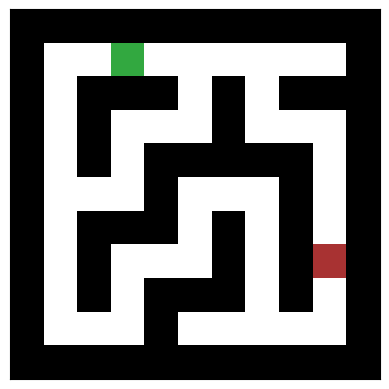

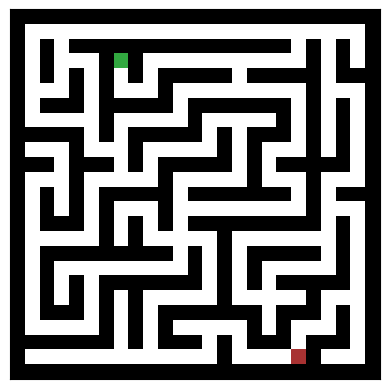

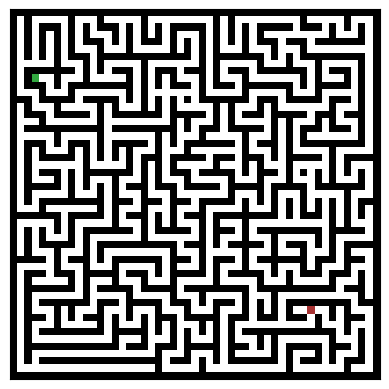

In [ ]:
for N, S, F in (11, (1, 3), (7, 9)), (25, (3, 7), (23, 19)), (51, (9, 3), (41, 41)):
    map = Maze(N, S, F, threshold=2/(N*np.log(N)))
    map.draw_map()

## Μέρος 2


In [ ]:
from queue import PriorityQueue

class pathfinder:
    def __init__(self, S, F, grid, c, h,visualize=True):
        self.S = S
        self.F = F
        self.grid = grid
        self.cost = c
        self.heuristic = h
        self.no_expanded_nodes = 0

        #for visualization
        self.visualize=visualize
        self.vis = visualization(S, F)
        self.find_path()

        self.visited = np.zeros((self.grid.N, self.grid.N), dtype = bool)

    def find_path(self):
        frontier = PriorityQueue()
        frontier.put((0, self.S))
        came_from = {}
        cost_so_far = {}
        came_from[self.S] = None
        cost_so_far[self.S] = 0
        self.no_expanded_nodes = 0

        while not frontier.empty():
            current = frontier.get()[1]
            if current == self.F:
                break
            self.no_expanded_nodes += 1


            for next in  self.grid.adjacent_no_walls(current):
                new_cost = cost_so_far[current] + self.cost(current, next)

                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost

                    priority = new_cost + self.heuristic(next, self.F)

                    frontier.put((priority, next))
                    came_from[next] = current
                #for animation
                #find frontier and expanded nodes
                restore = []
                while not frontier.empty():
                    node = frontier.get()
                    restore.append(node)
                for node in restore:
                    frontier.put(node)
                exp = []
                #find expanded nodes
                for v in came_from:
                    if v:
                        exp.append(v)
                if self.visualize:
                  self.vis.draw_step(self.grid, [r[1] for r in restore], exp)


        # follow backlinks to build path
        # current = self.F
        path = []
        while current != self.S:
            path.append(current)
            if current not in came_from:
              self.grid.draw_map()
            current = came_from[current]
        path.append(self.S)
        path.reverse()

        self.path = path

    def get_path(self):
        return self.path

    def get_complexity(self):
        return self.no_expanded_nodes




In [ ]:
import math

## A heuristic
def euclidean(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


In [5]:
## Create a 41x41 maze
N = 41
S = (3, 3)
F = (39, 39)

map = Maze(N, S, F)

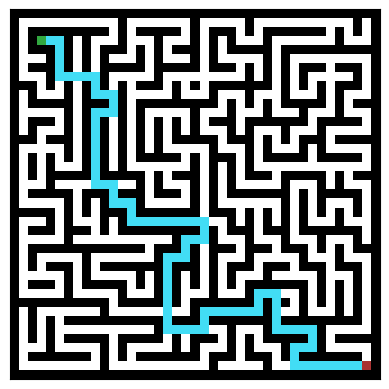

CPU times: user 511 ms, sys: 70.6 ms, total: 581 ms
Wall time: 565 ms


In [8]:
%%time
## Find and visualize the path
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
map.draw_map(pf.get_path())

In [9]:
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

Number of expanded nodes: 677


In [11]:
print(len(pf.get_path()))

97


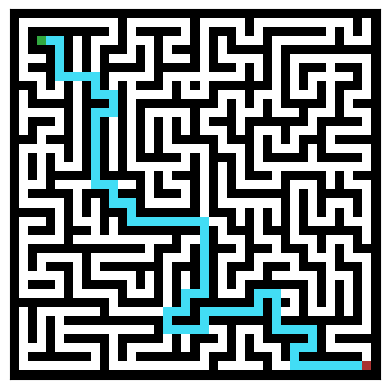

CPU times: user 380 ms, sys: 59 ms, total: 439 ms
Wall time: 415 ms


In [12]:
%%time
pf = pathfinder(S, F, map, lambda x, y: 1, euclidean)
map.draw_map(pf.get_path())

In [13]:
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

Number of expanded nodes: 536


In [14]:
print(len(pf.get_path()))

97


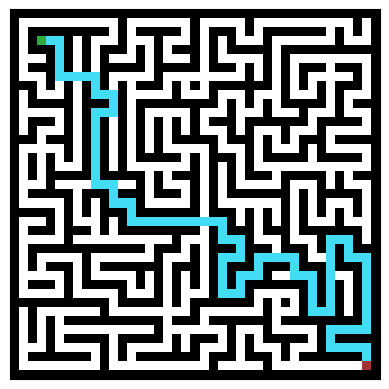

CPU times: user 118 ms, sys: 28.4 ms, total: 146 ms
Wall time: 120 ms


In [15]:
%%time
pf = pathfinder(S, F, map, lambda x, y: 0, euclidean)
map.draw_map(pf.get_path())

In [16]:
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

Number of expanded nodes: 131


In [17]:
print(len(pf.get_path()))

113


The first run uses the Dijkstra algorithm, then the A* algorithm, and finally the Best-First algorithm. We initially observe that the Best-First algorithm expanded the fewest nodes, followed by A*, and lastly Dijkstra. However, the latter two algorithms find the shortest path, whereas the Best-First algorithm does not. Furthermore, we notice that the Best-First algorithm produced a result faster than A*, which in turn produced a result faster than Dijkstra. Finally, it should be stressed that Dijkstra always finds the optimal path, A* finds the optimal path only if our heuristic is admissible, and the Best-First algorithm does not always find the optimal path, as seen from the results.

## Part 3

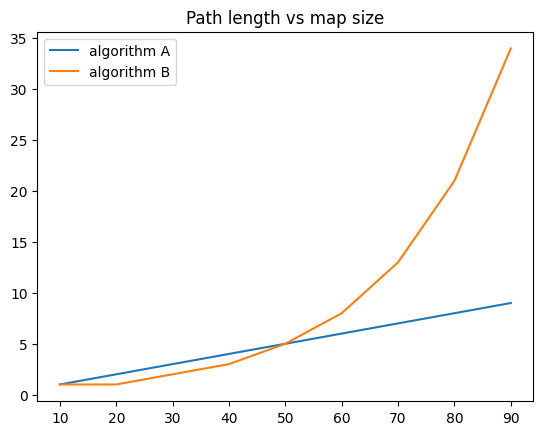

In [ ]:
path_lengths_a = [1,2,3,4,5,6,7,8,9]
path_lengths_b = [1,1,2,3,5,8,13,21,34]
map_sizes = [10,20,30,40,50,60,70,80,90]

plt.plot(map_sizes, path_lengths_a)
plt.plot(map_sizes, path_lengths_b )
plt.legend(['algorithm A', 'algorithm B'])
plt.title('Path length vs map size')
plt.show()

In [ ]:
algorithms = ["Best-First", "Dijkstra", "A*"]

In [ ]:
def getStatistics(S,F, map, c, h):
    pf = pathfinder(S, F, map, c, h)
    pf.find_path()
    return (len(pf.get_path()), pf.get_complexity())

11
21
31
41
51
61
71
81
91
101


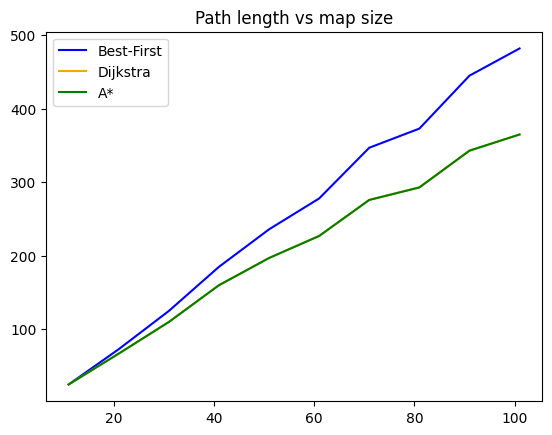

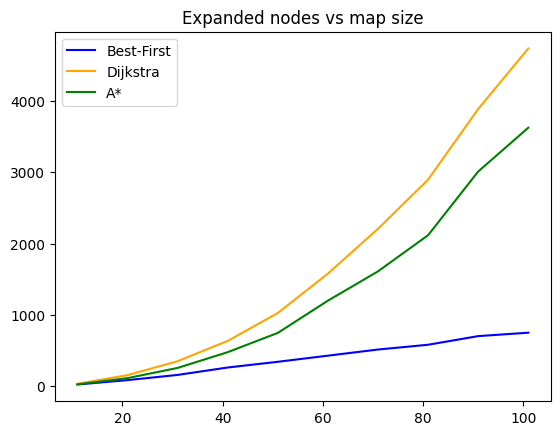

In [ ]:
Sizes = [11,21,31,41,51,61,71,81,91,101]
Dijkstra_expanded_nodes = [] #list for the expanded nodes for each length
Dijkstra_pathlength = [] #list for the minimum path for each length
A_Star_expanded_nodes = [] #list for the expanded nodes for each length
A_Star_pathlength = [] #list for the minimum path for each length
Best_First_expanded_nodes = [] #list for the expanded nodes for each length
Best_First_pathlength = [] #list for the minimum path for each length

for n in Sizes: ## maze dimension
        pl1 = en1 = pl2 = en2 = pl3 = en3 = 0
        S = (1, 1)
        F = (n - 2 , n - 2)
        print(n)
        for _ in range(100):
            map = Maze(n, S, F)
            #map.draw_map()

            PL1, EN1 = getStatistics(S, F, map, c = lambda x, y: 0, h = lambda x, y: manhattan(x, y)) #Best-First
            pl1 += PL1
            en1 += EN1
            PL2, EN2 = getStatistics(S, F, map, c = lambda x, y: 1, h = lambda x, y: 0)               #Dijkstra
            pl2 += PL2
            en2 += EN2
            PL3, EN3 = getStatistics(S, F, map, c = lambda x, y: 1, h = lambda x, y: manhattan(x, y)) #A*
            pl3 += PL3
            en3 += EN3

        ## divisions to get average
        Best_First_expanded_nodes.append(en1//100)
        Best_First_pathlength.append(pl1//100)
        Dijkstra_expanded_nodes.append(en2//100)
        Dijkstra_pathlength.append(pl2//100)
        A_Star_expanded_nodes.append(en3//100)
        A_Star_pathlength.append(pl3//100)


plt.figure()
plt.plot(Sizes,Best_First_pathlength, color = 'blue')
plt.plot(Sizes,Dijkstra_pathlength,color = 'orange')
plt.plot(Sizes, A_Star_pathlength, color = 'green')
plt.legend(algorithms)
plt.title('Path length vs map size')
plt.show()


plt.figure()
plt.plot(Sizes,Best_First_expanded_nodes, color = 'blue')
plt.plot(Sizes,Dijkstra_expanded_nodes,color = 'orange')
plt.plot(Sizes, A_Star_expanded_nodes, color = 'green')
plt.legend(algorithms)
plt.title('Expanded nodes vs map size')
plt.show()



From the first chart, we initially observe that the Dijkstra and A* algorithms always find the fastest path, which is why there are only two lines in the chart (one overlaying the other). Additionally, we notice that for Best-First, as the labyrinth size increases, it becomes increasingly difficult to find the optimal path. 

From the second chart, we observe that Dijkstra expands the most nodes, followed by A*, and finally Best-First. It is noteworthy that as the labyrinth size increases, the number of expanded nodes grows quadratically for the Dijkstra and A* algorithms, whereas it increases linearly for the Best-First algorithm.

## Part 4

In [74]:
class Agent:
  def __init__(self,S,grid,color, name = ""):
    self.agent_name = name
    self.location = S
    self.color=color
    self.maze = grid
    self.maze.agents.append(self)
    self.maze.grid[S]=1
    self.path=[]

  def find_path(self,F):
    c = lambda x,y: 1
    h = euclidean
    pf = pathfinder(self.location, F, self.maze, c, h, visualize=False)
    self.path = pf.path


  def move(self):
    if len(self.path)<1:
      return
    if self.location==self.path[0] and len(self.path)>1:
      self.location=self.path[1]
      self.path = self.path[2:]
    else:
      self.location=self.path[0]
      self.path=self.path[1:]

  def move_to(self, loc):
    self.location = loc

In [ ]:
class ABagent:
  def __init__(self, S, grid, color, name = ""):
    self.agent_name = name
    self.location = S
    self.color=color
    self.maze = grid
    self.maze.agents.append(self)
    self.maze.grid[S]=1
    self.path=[]

  def get_best_action(self, ghosts, depth = 3):
      best_action = None
      best_score = float("-inf") #you can use this for debugging
      alpha = float("-inf")
      beta = float("inf")

      best_score, best_action = self.alpha_beta_agent(self.maze, self.location, ghosts, depth, alpha, beta, True)
      print("best score", best_score)
      return best_action

  def alpha_beta_agent(self, maze, agent_pos, ghost_positions, depth, alpha, beta, maximizing_player = True):
      if depth == 0 or self.is_win(maze, agent_pos) or self.is_lose(agent_pos, ghost_positions):
          # Return the heuristic value if we've reached the maximum depth or the game is over
          return self.heuristic_AB(map, agent_pos, ghost_positions), agent_pos

      if maximizing_player:
          # Agent is the maximizing player
          best_score = float("-inf")
          best_action = None
          for successor_state in maze.adjacent_no_walls(agent_pos):
              score, _ = self.alpha_beta_agent(maze, successor_state, ghost_positions, depth - 1, alpha, beta, True)
              if score > best_score:
                  best_score = score
                  best_action = successor_state
              alpha = max(alpha, score)
              if beta <= alpha:
                  break
          return best_score, best_action
      else:
          # Ghosts are the minimizing players
          
            best_score = float("inf")
            best_action = None
            for ghost_pos in ghost_positions:
              for successor_state in maze.adjacent_no_walls(ghost_pos):
                  score, _ = self.alpha_beta_agent(maze, agent_pos, successor_state, depth - 1, alpha, beta, False)
                  if score < best_score:
                      best_score = score
                      best_action = successor_state
                  beta = min(beta, score)
                  if beta <= alpha:
                      break
              return best_score, best_action
          


  def is_win(self, maze, agent):
      
      return agent == maze.F
      

  def is_lose(self, agent, ghosts):
      if np.any(agent == ghosts):
        return True
      else:
        return False
      



  def heuristic_AB(self, maze, agent_pos, ghost_positions):
  
    # Calculate distance to goal (base heuristic value)
    distance_to_goal = - manhattan(agent_pos, maze.F)

    # Consider ghost positions
    avoidance_penalty = 0
    # Calculate distance from agent to ghost
    for ghost_pos in ghost_positions:
      distance_to_ghost = euclidean(agent_pos, ghost_pos)
    # Add penalty if agent is too close to a ghost
      if distance_to_ghost < 1:
        avoidance_penalty -= 100
      elif distance_to_ghost < 2:
        avoidance_penalty -= 50
      elif distance_to_ghost < 3:
        avoidance_penalty -= 20
      elif distance_to_ghost < 4:
        avoidance_penalty -= 5

    # Combine heuristic values
    heuristic_value = distance_to_goal + avoidance_penalty

    return heuristic_value
      

  def move_to(self, loc):
    self.location = loc

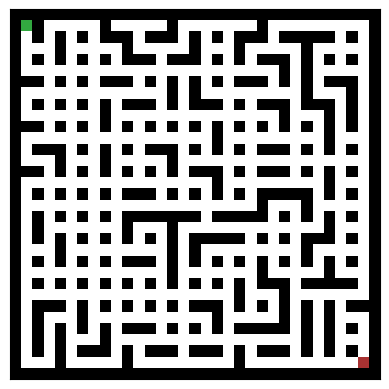

In [109]:
#create a sparse map with many paths, like the one below
map = Maze(33, (1,1), (31,31), threshold=0.233)
map.draw_map()

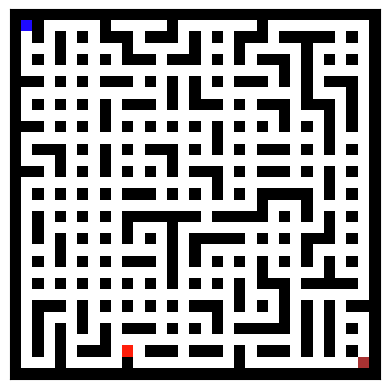

In [110]:
x, y = np.random.choice(range(1, 31)), np.random.choice(range(1, 31))
ghost = (Agent((x, y), map, [255,30,10], "ghost"))

a1 = ABagent((1,1), map,[30,10,255], "agentAB")

map.draw_map()

In [111]:
vis=visualization((1,1),(31,31))

visited = [a1.location] #HINT: this might be helpful to you

for i in range(1000):
  if a1.location==(31,31):
    print("Win")
    break

  if a1.location == ghost.location:
    print("Lose")
    break

  if i%1==0: #controls agent speed
    best_move = a1.get_best_action([ghost.location], 1)
    a1.move_to(best_move)
    visited.append(a1.location)


  if i%1==0: #controls ghost speed
    ghost.find_path(a1.location)
    ghost.move()

  im = map.draw_map(return_image=True)
  vis.images.append(im)

best score -59
best score -58
best score -57
best score -56
best score -55
best score -54
best score -53
best score -52
best score -51
best score -50
best score -49
best score -48
best score -47
best score -46
best score -45
best score -44
best score -43
best score -47
best score -48
best score -49
best score -50
best score -51
best score -65
best score -64
best score -48
best score -47
best score -46
best score -45
best score -44
best score -43
best score -42
best score -41
best score -40
best score -39
best score -38
best score -37
best score -36
best score -35
best score -49
best score -48
best score -49
best score -50
best score -36
best score -37
best score -51
best score -50
best score -49
best score -48
best score -32
best score -31
best score -45
best score -44
best score -28
best score -27
best score -43
best score -42
best score -41
best score -40
best score -39
best score -38
best score -22
best score -21
best score -20
best score -19
best score -18
best score -17
best score

In [112]:
vis.create_gif(fps=1)
vis.show_gif()